# Setting up and loading the data

In [17]:
library(foreign)
library(ggplot2)
require(data.table) # v1.9.0+
require(dplyr) # v1.9.0+

Loading required package: dplyr
Warning message:
“Installed Rcpp (0.12.14) different from Rcpp used to build dplyr (0.12.11).
Please reinstall dplyr to avoid random crashes or undefined behavior.”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
wber <- read.dta("/Users/victordesalins/Documents/Toulouse M2/Cours/Empirical project (BEER)/wber.dta")
upcber <- read.dta("/Users/victordesalins/Documents/Toulouse M2/Cours/Empirical project (BEER)/upcber.dta")


In [3]:
ber=merge(x = upcber, y=wber, by="upc")

---

# A few descriptive stats

In [4]:
number_upc=length(unique(ber$upc))
number_beer_title=length(unique(ber$descrip))
number_nitem=length(unique(ber$nitem))

There are **{{number_upc}}** different UPCs <br>
**{{number_beer_title}}** different beer titles  <br>
and **{{number_nitem}}** "nitem" values in the dataset.

## Number of beers on the market

In [6]:
# getting the number of beers depending on the variable we want to use as a proxy
beer_nb_market<- data.frame(unique(ber$week))
colnames(beer_nb_market) <- "week"


for ( i in 1 : nrow(beer_nb_market)){
  beer_nb_market$nb_beers_upc[i] <- nrow(data.frame(unique(ber$upc[ber$week== beer_nb_market$week[i]])))
  beer_nb_market$nb_beers_descrip[i] <- nrow(data.frame(unique(ber$descrip[ber$week== beer_nb_market$week[i]])))
  beer_nb_market$nb_beers_nitem[i] <- nrow(data.frame(unique(ber$nitem[ber$week== beer_nb_market$week[i] ])))
}



In [7]:
beer_nb_market=beer_nb_market[order(beer_nb_market$week),]
beer_nb_market

,week,nb_beers_upc,nb_beers_descrip,nb_beers_nitem
211,91,342,186,304
212,92,342,186,304
213,93,342,186,304
214,94,342,186,304
215,95,342,186,304
216,96,342,186,304
217,97,342,186,304
218,98,342,186,304
219,99,342,186,304
220,100,342,186,304


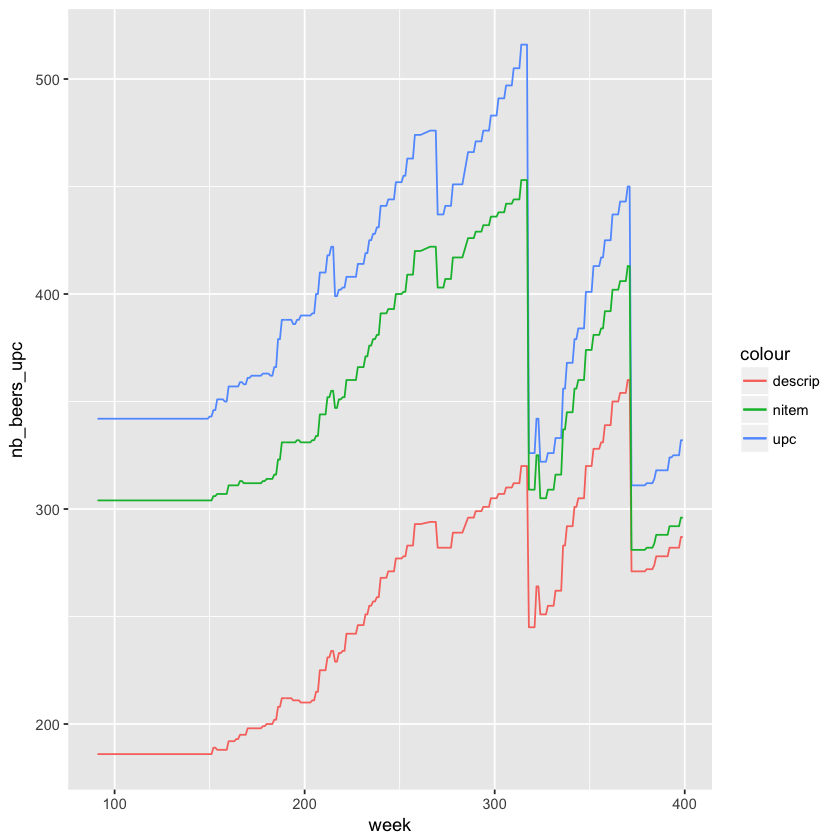

In [8]:
# plotting
ggplot(data = beer_nb_market)+ geom_line(aes(x=week,y=nb_beers_upc,color="upc"))+ geom_line(aes(x=week,y=nb_beers_descrip,color="descrip"))+ geom_line(aes(x=week,y=nb_beers_nitem,color="nitem"))

## Which variable to use for product proxy ?

In [26]:
setDT(ber) # converts data which is a data.frame to data.table *by reference*
setDT(upcber) 

In [15]:
ber[,unique(nitem),by="upc"]

upc,V1
294,9990180
307,9490410
710,9402300
711,9402650
712,9402600
720,9410150
721,9410230
723,9428700
731,9451440
732,9451200


In [61]:
nrow(upcber[,.N,by="nitem"][N>1])
upcber[,.N,by="nitem"][N>1]

[1] 112

nitem,N
9402300,2
9402650,3
9402600,3
9410150,2
9410230,2
9428700,2
9451440,3
9451200,2
9451920,2
9406750,2


In [60]:
upcber[nitem==9440810,]

com_code,upc,descrip,size,case,nitem
26,272500017,MURPHYS IRSH AMBER (,6/12 O,4,9440810
26,60272500017,MURPHYS IRSH AMBER (,6/12 O,4,9440810


In [38]:
nitem_upc=upcber[,unique(upc),by="nitem"]
nitem_upc

## Data on manufacturers

In [9]:
#creating a variable representing the manufacturer

upc_list<- data.frame(unique(ber$upc))
colnames(upc_list) <- "upc"

for (i in 1:nrow(upc_list)){
    upc_list$manufacturer[i]=substring(upc_list$upc[i],1,5)
    ber$manufacturer[ber$upc==upc_list$upc[i]] <- upc_list$manufacturer[i]
}

#merge(x=ber, y=upc_list, by="upc")
length(unique(ber$manufacturer))



[1] 130

In [10]:
for (i in unique(ber$manufacturer)){
    ber$manu_entry[ber$manufacturer==i] <- min(ber$week[ber$manufacturer == i])
    ber$manu_exit[ber$manufacturer==i] <- max(ber$week[ber$manufacturer == i])
}

weeks_entry_manu=length(unique(ber$manu_entry))
weeks_exit_manu=length(unique(ber$manu_exit))
manu_entry=length(unique(ber$manufacturer[ber$manu_entry!=91]))
manu_exit=length(unique(ber$manufacturer[ber$manu_exit!=399]))


There are **{{weeks_entry_manu}} weeks during which the entry of a new manufacturer occurs** while only **{{weeks_exit_manu}} weeks during which some manufacturers leave the market**. 
Based on the beer description there are only **{{manu_entry}} entries of new manufacturers** on the market (based on its description) and **{{manu_exit}} manufacturers exiting**.

### Entry

In [9]:
manu_entry_dates<- data.frame(unique(ber$manu_entry))
colnames(manu_entry_dates) <- "week"


for ( i in 1 : nrow(manu_entry_dates)){
    manu_entry_dates$nb_manu[i] <- nrow(data.frame(unique(ber$manufacturer[ber$manu_entry== manu_entry_dates$week[i] ])))
}

manu_entry_dates=manu_entry_dates[manu_entry_dates$week!=91,]
manu_entry_dates=manu_entry_dates[order(manu_entry_dates$week),]



In [10]:
manu_entry_dates[1:10,]

,week,nb_manu
31,160,1
18,166,1
15,178,1
2,186,2
26,208,2
25,216,1
19,218,2
14,228,1
30,238,1
1,248,1


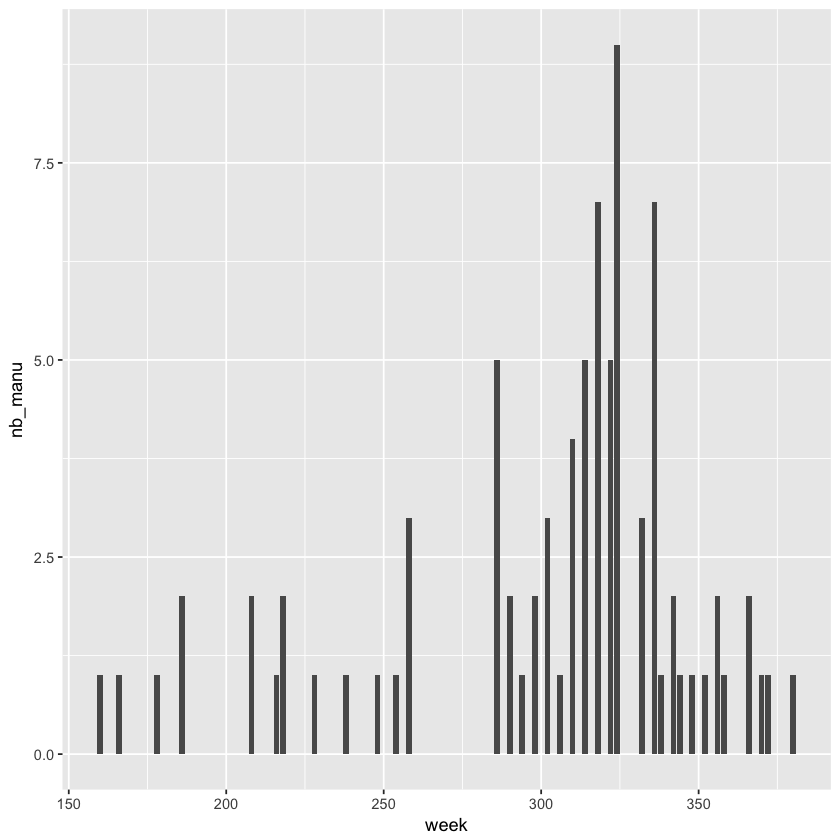

In [11]:
#plotting UPC
ggplot(data = manu_entry_dates, aes(x=week,y = nb_manu))+ geom_col()

### Exit of manufacturers

In [12]:
manu_exit_dates<- data.frame(unique(ber$manu_exit))
colnames(manu_exit_dates) <- "week"


for ( i in 1 : nrow(manu_exit_dates)){
    manu_exit_dates$nb_manu[i] <- nrow(data.frame(unique(ber$manufacturer[ber$manu_exit== manu_exit_dates$week[i] ])))
}

manu_exit_dates=manu_exit_dates[manu_exit_dates$week!=399,]
manu_exit_dates=manu_exit_dates[order(manu_exit_dates$nb_manu),]



In [13]:
manu_exit_dates

,week,nb_manu
6,379,1
8,277,1
9,273,1
10,219,1
4,269,2
5,323,4
7,215,4
1,371,9
3,317,16


In [14]:
unique(ber$descrip[ber$manu_exit== 317])

[1] "BUDWEISER BEER"       "BUDWEISER DRY BEER"   "BUDWEISER LIGHT BEER"
 [4] "COORS BEER"           "COORS EXTRA GOLD BEE" "KEYSTONE REGULAR BEE"
 [7] "MILLER HIGH LIFE PAR" "MILLER LITE BEER"     "MILWAUKEE'S BEST BEE"
[10] "OLD MILWAUKEE BEER"   "OLD STYLE BEER"       "OLD STYLE 30PK CANS" 
[13] "STROHS LIGHT BEER"    "COORS PARTY BALL TAP" "SCHAEFER BEER CANS"  
[16] "CARLINGS BLK LABEL R"

In [15]:
ber$upc[ber$descrip=="BUDWEISER BEER"]

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [71]:
unique(ber$upc[ber$manu_exit== 317])

[1]        710        711        712        720        721        723
 [7]        731        732        735        740        750        757
[13]        772 4327900100 7248001103 7272001431 7272001435

In [ ]:
unique(ber$upc[ber$manu_exit== 317])

### Number of manufacturer

In [58]:
# getting the number of beers depending on the variable we want to use as a proxy
manu_nb_market<- data.frame(unique(ber$week))
colnames(manu_nb_market) <- "week"


for ( i in 1 : nrow(manu_nb_market)){
  manu_nb_market$nb_manu[i] <- nrow(data.frame(unique(ber$manufacturer[ber$week==manu_nb_market$week[i]])))
}


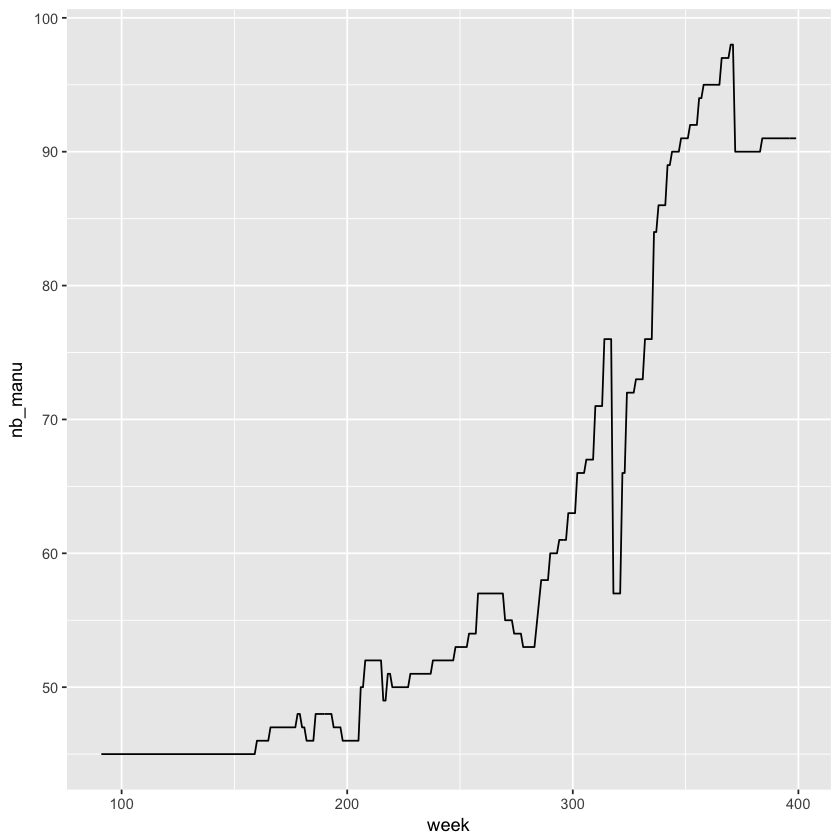

In [59]:
# plotting
ggplot(data = manu_nb_market)+ geom_line(aes(x=week,y=nb_manu))


---

# Data on entry and exit of beers on the market

### Descrip variable

In [7]:
# creating for each beer its date of entry on the market and its date of exit based on beer title.

for (i in unique(ber$descrip)){
    ber$beer_entry[ber$descrip==i] <- min(ber$week[ber$descrip == i])
    ber$beer_exit[ber$descrip==i] <- max(ber$week[ber$descrip == i])
}

weeks_entry_descrip=length(unique(ber$beer_entry))
weeks_exit_descrip=length(unique(ber$beer_exit))
beer_entry_descrip=length(unique(ber$descrip[ber$beer_entry!=91]))
beer_exit_descrip=length(unique(ber$descrip[ber$beer_exit!=399]))


There are **{{weeks_entry_descrip}} weeks during which the entry of a new beer occurs** while only **{{weeks_exit_descrip}} weeks during which some beers leave the market**. 
Based on the beer description there are only **{{beer_entry_descrip}} entries of new beer** on the market (based on its description) and **{{beer_exit_descrip}} beers exiting**.

### UPC variable

In [8]:
# creating for each beer its date of entry on the market and its date of exit based on UPC.

for (i in unique(ber$upc)){
    ber$beer_entry[ber$upc==i] <- min(ber$week[ber$upc == i])
    ber$beer_exit[ber$upc==i] <- max(ber$week[ber$upc == i])
}
weeks_entry_upc=length(unique(ber$beer_entry))
weeks_exit_upc=length(unique(ber$beer_exit))
beer_entry_upc=length(unique(ber$upc[ber$beer_entry!=91]))
beer_exit_upc=length(unique(ber$upc[ber$beer_exit!=399]))


There are **{{weeks_entry_upc}} weeks during which the entry of a new beer occurs** while only **{{weeks_exit_upc}} weeks during which some beers leave the market**. 
Based on the UPC there are only **{{beer_entry_upc}} entries of new beer** on the market (based on its UPC) and **{{beer_exit_upc}} beers exiting**.

### nitem variable

In [9]:
# creating for each beer its date of entry on the market and its date of exit based on "nitem" variable.

for (i in unique(ber$nitem)){
    ber$beer_entry[ber$nitem==i] <- min(ber$week[ber$nitem == i])
    ber$beer_exit[ber$nitem==i] <- max(ber$week[ber$nitem == i])
}
weeks_entry_nitem=length(unique(ber$beer_entry))
weeks_exit_nitem=length(unique(ber$beer_exit))
beer_entry_nitem=length(unique(ber$nitem[ber$beer_entry!=91]))
beer_exit_nitem=length(unique(ber$nitem[ber$beer_exit!=399]))

There are **{{weeks_entry_nitem}} weeks during which the entry of a new beer occurs** while only **{{weeks_exit_nitem}} weeks during which some beers leave the market**. 
Based on the nitem variable there are only **{{beer_entry_nitem}} entries of new beer** on the market (based on its nitem value) and **{{beer_exit_nitem}} beers exiting**.

## Deriving the number of ENTRY per week

In [11]:

beer_entry_dates<- data.frame(unique(ber$beer_entry))
colnames(beer_entry_dates) <- "week"


for ( i in 1 : nrow(beer_entry_dates)){
    beer_entry_dates$nb_beers_nitem[i] <- nrow(data.frame(unique(ber$nitem[ber$beer_entry== beer_entry_dates$week[i] ])))
    beer_entry_dates$nb_beers_upc[i] <- nrow(data.frame(unique(ber$upc[ber$beer_entry== beer_entry_dates$week[i] ])))
    beer_entry_dates$nb_beers_descrip[i] <- nrow(data.frame(unique(ber$descrip[ber$beer_entry== beer_entry_dates$week[i] ])))
}

beer_entry_dates=beer_entry_dates[beer_entry_dates$week!=91,]
beer_entry_dates=beer_entry_dates[order(beer_entry_dates$week),]


ERROR: Error in `colnames<-`(`*tmp*`, value = "week"): attribut 'names' [1] doit être de même longueur que le vecteur [0]


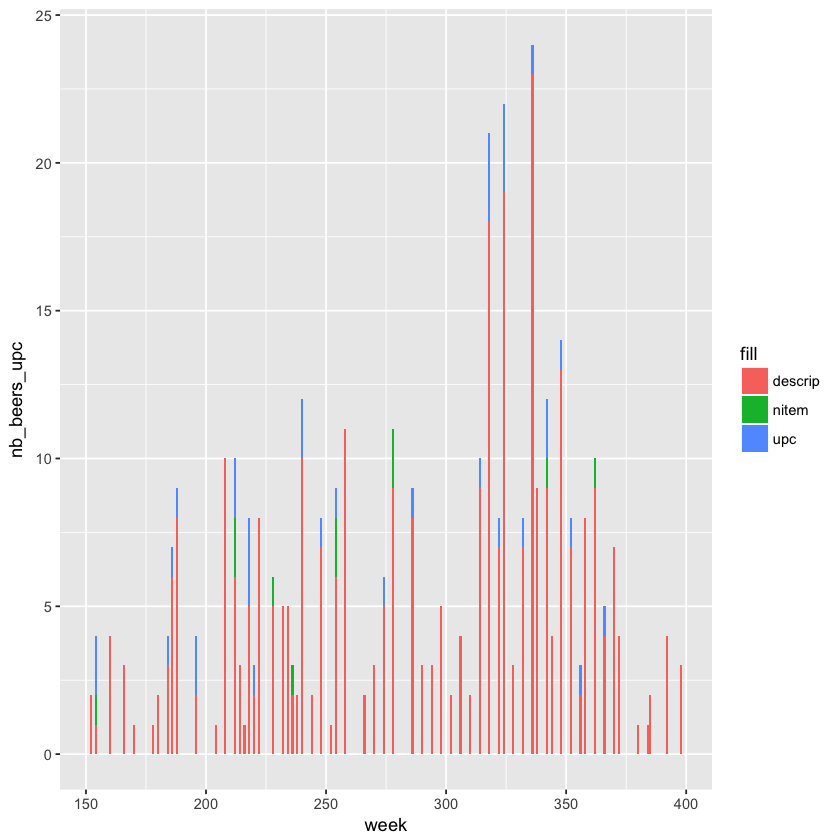

In [11]:
#plotting all variables
ggplot(data = beer_entry_dates)+ geom_col(aes(x=week,y = nb_beers_upc, fill="upc")) + geom_col(aes(x=week,y = nb_beers_nitem, fill="nitem")) + geom_col(aes(x=week,y = nb_beers_descrip, fill="descrip"))

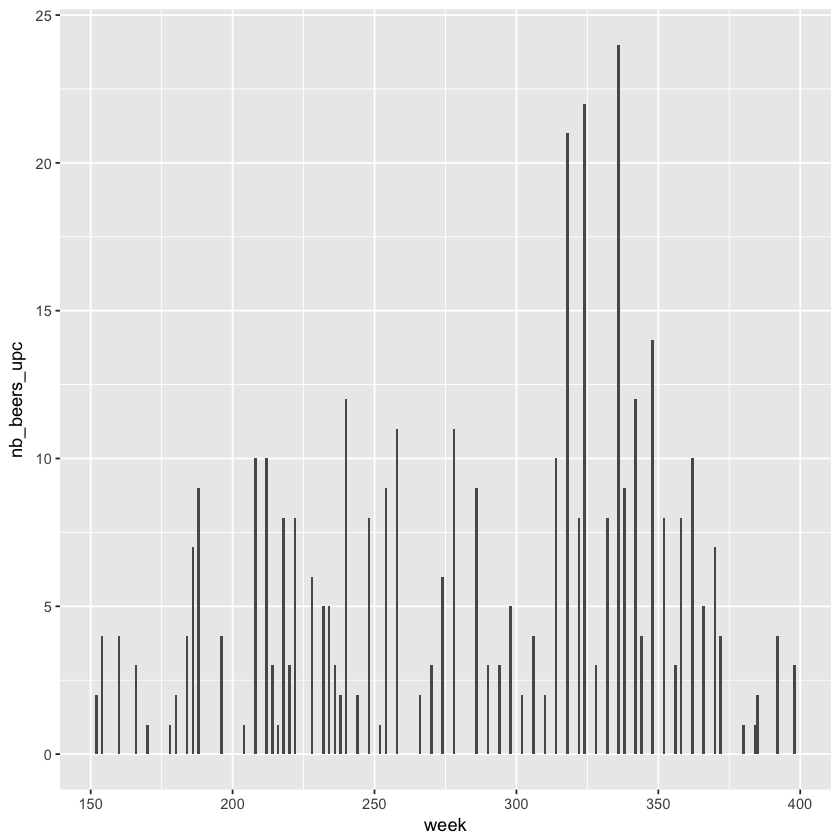

In [12]:
#plotting UPC
ggplot(data = beer_entry_dates, aes(x=week,y = nb_beers_upc))+ geom_col()

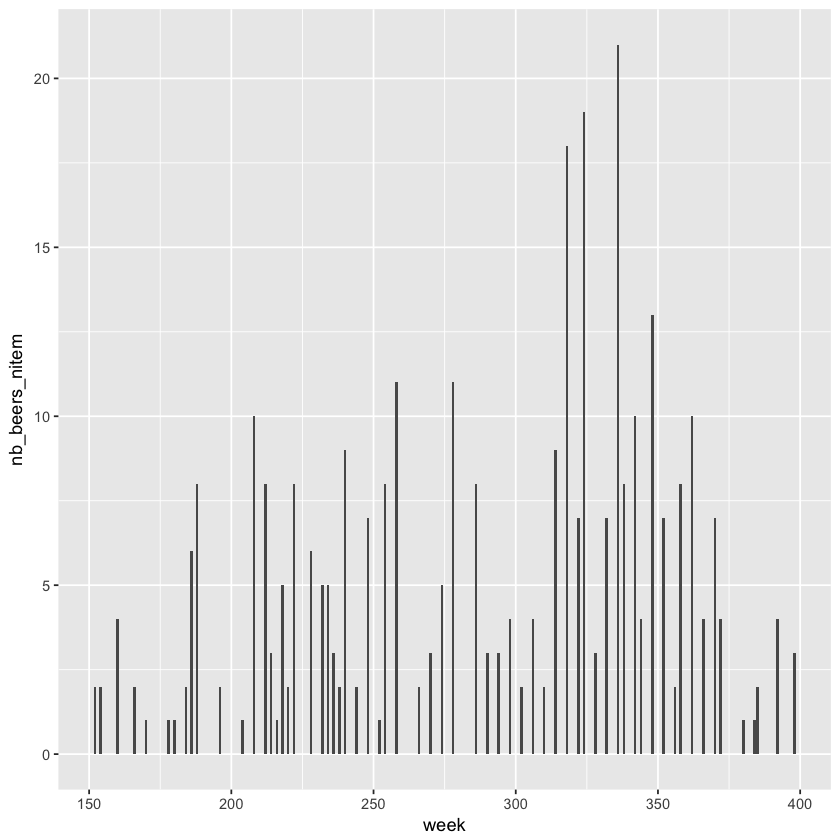

In [13]:
#plotting nitem
ggplot(data = beer_entry_dates, aes(x=week,y = nb_beers_nitem))+ geom_col()

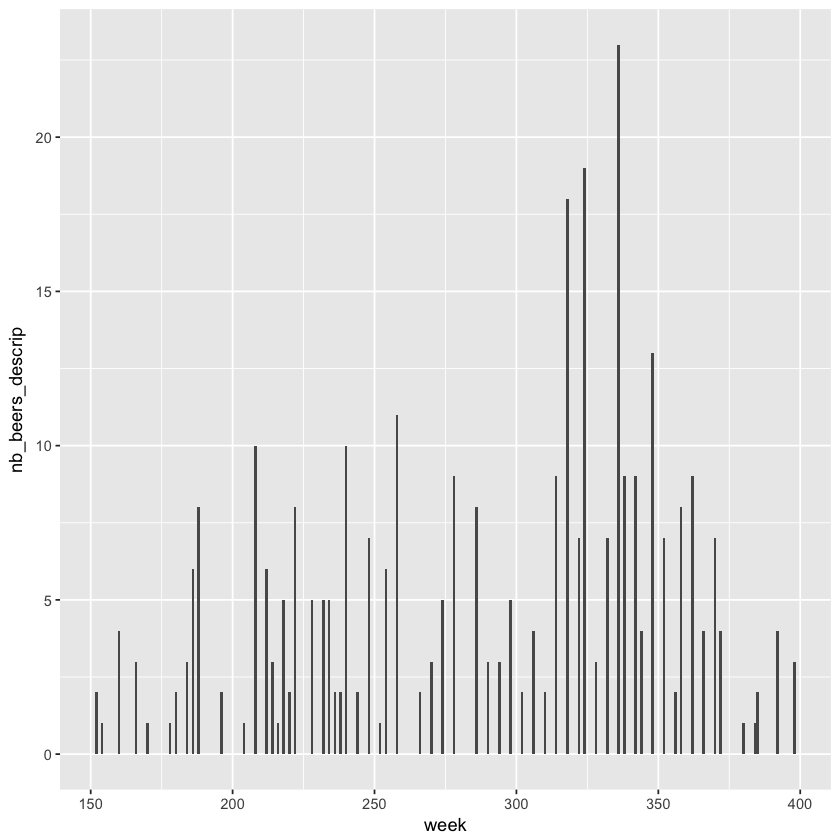

In [14]:
#plotting descrip
ggplot(data = beer_entry_dates, aes(x=week,y = nb_beers_descrip))+ geom_col()

## Deriving the number of EXIT per week

In [15]:

beer_exit_dates<- data.frame(unique(ber$beer_exit))
colnames(beer_exit_dates) <- "week"

for ( i in 1 : nrow(beer_exit_dates)){
  beer_exit_dates$nb_beers[i] <- nrow(data.frame(unique(ber$upc[ber$beer_exit== beer_exit_dates$week[i] ])))
}

beer_exit_dates=beer_exit_dates[beer_exit_dates$week!=399,]
beer_exit_dates=beer_exit_dates[order(beer_exit_dates$week),]


In [16]:
beer_exit_dates

,week,nb_beers
9,153,1
11,167,1
8,215,8
10,217,1
14,219,1
4,269,23
13,273,1
12,277,1
3,317,157
6,321,3


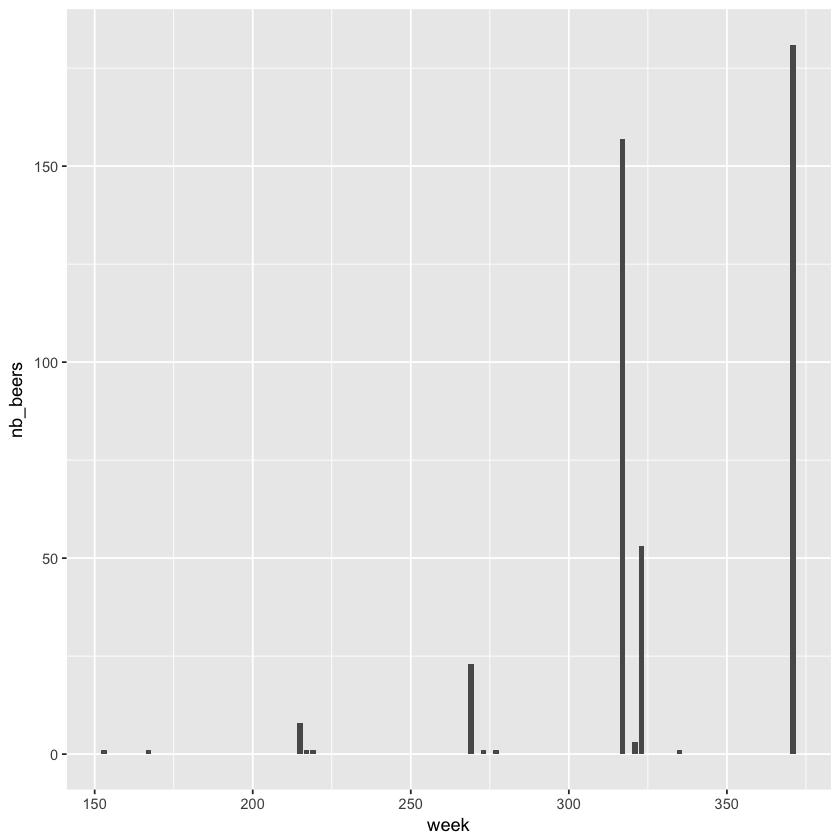

In [17]:
#plotting
ggplot(data = beer_exit_dates, aes(x=week,y = nb_beers))+ geom_col()

# Study on the characteristics of new products

# Draft

In [5]:
ber[1:10,]

upc,com_code,descrip,size,case,nitem,store,week,move,qty,price,sale,profit,ok
294,27,BEER LIMIT,12/12O,2,9990180,2,298,11,1,2.62,,-18.83,1
294,27,BEER LIMIT,12/12O,2,9990180,2,299,9,1,2.51,,18.47,1
294,27,BEER LIMIT,12/12O,2,9990180,2,300,6,1,2.49,,13.60,1
294,27,BEER LIMIT,12/12O,2,9990180,2,301,5,1,2.99,,-67.89,1
294,27,BEER LIMIT,12/12O,2,9990180,2,302,1,1,2.49,,13.60,1
294,27,BEER LIMIT,12/12O,2,9990180,2,303,0,1,0.00,,0.00,1
294,27,BEER LIMIT,12/12O,2,9990180,2,304,1,1,4.99,,-20.44,1
294,27,BEER LIMIT,12/12O,2,9990180,2,305,0,1,0.00,,0.00,1
294,27,BEER LIMIT,12/12O,2,9990180,2,306,0,1,0.00,,0.00,1
294,27,BEER LIMIT,12/12O,2,9990180,2,307,0,1,0.00,,0.00,1
